<a href="https://colab.research.google.com/github/Atharva462/Computer-Graphics-Codes/blob/main/Arecanut_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Arecanut Yield Prediction Project</h1>



***Project Statement:*** `Developing a predictive model to estimate the production yield of Arecanut in the india can address several critical issues. By utilizing historical data and features such as state, district, crop, year, season, and area, this model can provide accurate predictions of Arecanut production and yield. This capability is essential for effective planning and optimization of agricultural practices, resource allocation, and policy-making. The main problem is the lack of reliable, data-driven insights to guide decisions, which can lead to suboptimal resource use, inefficient agricultural practices, and uninformed policy-making. By predicting Arecanut yield more accurately, stakeholders can enhance productivity, improve resource management, and support sustainable agricultural development in the region`

<h2> Step 1: Import libraries</h2>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Saving India Agriculture Crop Production(in).csv to India Agriculture Crop Production(in).csv


<h2>Step 2: Load dataset</h2>

In [10]:
file_path = "/content/India Agriculture Crop Production(in).csv"  # Upload your file to Colab first
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)

Dataset Loaded Successfully
Dataset Shape: (345407, 10)


<h2>Step 3: Basic Information</h2>

In [11]:
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB

--- Missing Values ---
State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Uni

<h2>Step 4: Display sample rows</h2>

In [12]:
print("\n--- Sample Data ---")
print(df.head())


--- Sample Data ---
                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296  


<h2>Step 5: Filter only Arecanut data</h2>

In [13]:
df_arecanut = df[df['Crop'].str.contains('Arecanut', case=False, na=False)]
print("\nFiltered Arecanut Data Shape:", df_arecanut.shape)


Filtered Arecanut Data Shape: (2192, 10)


<h2>Step 6: Handle missing or invalid data</h2>

In [14]:
df_arecanut = df_arecanut.dropna(subset=['Production', 'Area'])
df_arecanut = df_arecanut[df_arecanut['Area'] > 0]
df_arecanut = df_arecanut[df_arecanut['Production'] >= 0]

<h2>Step 7: Feature Engineering</h2>

In [15]:
df_arecanut['Yield'] = df_arecanut['Production'] / df_arecanut['Area']

<h2>Step 8: Encode categorical features</h2>

In [20]:
categorical_cols = ['State', 'District', 'Season', 'Year']
le = LabelEncoder()
for col in categorical_cols:
    df_arecanut[col] = le.fit_transform(df_arecanut[col].astype(str))

<h2>Step 9: Define features and target</h2>

In [22]:
X = df_arecanut[['State', 'District', 'Year', 'Season', 'Area']]
y = df_arecanut['Yield']

<h2>Step 10: Split data</h2>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Step 11: Scale features</h2>

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Step 12: Train Models</h2>

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
MAE: 1.7716737516580483
MSE: 6.49312756340393
RMSE: 2.5481616046483255
R² Score: 0.1930097848615131

Random Forest Performance:
MAE: 0.41627293561878354
MSE: 0.6070676286077866
RMSE: 0.7791454476590277
R² Score: 0.9245513611999658


<h2>Step 13: Hyperparameter Tuning (for Random Forest)</h2>

In [26]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


<h2>Step 14: Evaluate Tuned Model</h2>

In [27]:
y_pred_best = best_rf.predict(X_test_scaled)
print("\nTuned Random Forest Results:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Tuned Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
R² Score: 0.9255151021622218
RMSE: 0.7741532588318798


<h2>Step 15: Visualization</h2>

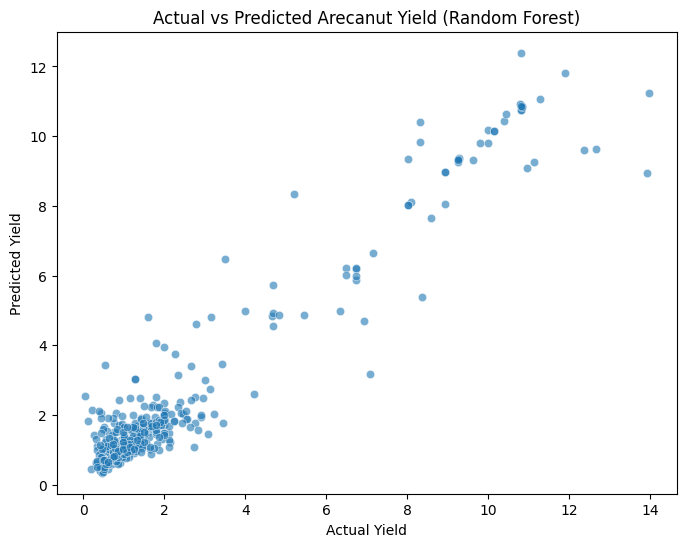

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Arecanut Yield (Random Forest)")
plt.show()

<h2>Step 16: Future Prediction Example</h2>

In [29]:
sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_yield = best_rf.predict(sample_input)
print("\n Predicted Arecanut Yield for Sample Input:", predicted_yield[0])


 Predicted Arecanut Yield for Sample Input: 8.263365016990624
